In [1]:
!pip install google_play_scraper
from google_play_scraper import app
import pandas as pd
import numpy as np
import string

In [5]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews(
    'app.signal.id',
    lang = 'id',
    country = 'id',
    sort = Sort.MOST_RELEVANT,
    count = 10000,
    filter_score_with=None,
)

In [6]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
scrappeddata1 = data[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=False)
sorteddata

,content,score,at
6638,sangat membantu dan mempermudah bayar pajak mo...,5,2024-07-08 12:21:55
5227,pertama kali mencoba pembayaran pajak kendaraa...,5,2024-07-08 11:51:38
6544,"aplikasi lemot gak bisa di pakee, daftar aja l...",1,2024-07-08 11:07:34
312,baru pertama menggunakan & bayar pajak via apl...,5,2024-07-08 10:53:27
9865,"sangat praktis, luar biasa.... Sangat membantu...",5,2024-07-08 10:48:16
...,...,...,...
4333,"bayar pajak jadi lebih mudah lewat aplikasi, t...",5,2021-07-06 09:44:03
6782,Sangat membantu skali utk pembayaran pajak men...,5,2021-07-05 08:44:15
9089,Sangat mempermudah dalam pembayaran pajak kend...,5,2021-07-05 04:48:09
8393,"Sangat berguna dan bermanfaat,tanpa ambil resi...",5,2021-07-05 02:57:58


In [4]:
sorteddata.to_csv("SIGNAL_1.csv", index = False)

In [35]:
sorteddata1 = pd.read_csv("SIGNAL_1.csv")

In [36]:
df = sorteddata1[['content','score','at']]
df

,content,score,at
0,good,5,2024-01-28 13:12:35
1,Memuaskan.. cepat prosesnya cepat dikirimnya,5,2024-01-28 12:30:05
2,"tidak repot,.. dokumen pkn cepat diantar",5,2024-01-28 12:26:24
3,proses di Samsat nya cepat tetapi pengiriman v...,4,2024-01-28 11:44:47
4,kerennn dan praktis...ga usah capek2 lagi luan...,5,2024-01-28 11:12:00
...,...,...,...
9995,Kereeeeen,5,2023-06-15 10:30:29
9996,sangat membantu,5,2023-06-15 10:30:20
9997,proses cepat dan akurat. mantab,5,2023-06-15 10:30:17
9998,Ok,5,2023-06-15 10:06:29


In [37]:
df['score'].value_counts()

score
5    7122
1    1415
4     765
3     411
2     287
Name: count, dtype: int64

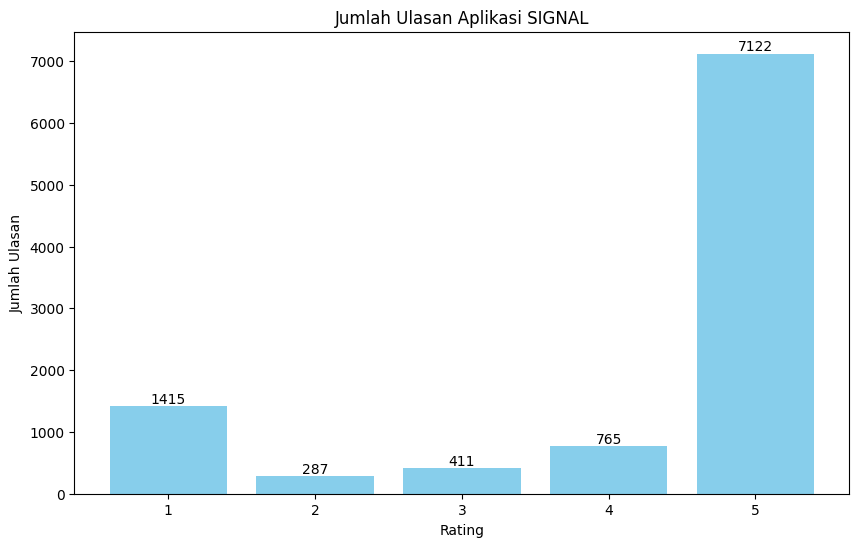

In [38]:
import matplotlib.pyplot as plt
# Menghitung jumlah ulasan untuk setiap skor
score_counts = df['score'].value_counts().sort_index()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
bars = plt.bar(score_counts.index, score_counts.values, color='skyblue')

# Menambahkan label untuk setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom')

plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')
plt.xticks(score_counts.index)
plt.title('Jumlah Ulasan Aplikasi SIGNAL')
plt.show()


In [39]:
import pandas as pd
from collections import Counter
import nltk
nltk.download('punkt')

# Tokenisasi teks
df['before'] = df['content'].apply(nltk.word_tokenize)

# Menghitung frekuensi kata sebelum preprocessing
all_words_before = [word.lower() for before in df['before'] for word in before]
word_freq_before = Counter(all_words_before)

# Ambil 30 kata yang paling sering muncul
most_common_words_before = word_freq_before.most_common(30)

# Membuat DataFrame untuk kata dominan sebelum preprocessing
df_most_common_before = pd.DataFrame(most_common_words_before, columns=['Kata', 'Frekuensi'])

# Tampilkan DataFrame sebagai tabel
print("Kata Dominan Sebelum Preprocessing:")
print(df_most_common_before)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Kata Dominan Sebelum Preprocessing:
          Kata  Frekuensi
0            ,       6619
1            .       4332
2       sangat       2741
3          dan       2493
4           di       2178
5        pajak       1994
6     membantu       1903
7         bisa       1700
8     aplikasi       1663
9        bayar       1652
10          ..       1413
11       tidak       1391
12       cepat       1346
13       mudah       1278
14          ke       1225
15       untuk       1172
16      samsat       1138
17         ini       1120
18         nya       1108
19        saya       1087
20        stnk       1030
21       sudah       1024
22          yg        993
23  pembayaran        986
24      mantap        981
25         ...        896
26      signal        875
27      proses        870
28       lebih        823
29        yang        749


**pelabelan**

In [40]:
sentimen = []
for index, row in df.iterrows():
    if row['score'] > 3:
        sentimen.append(1)
    else:
        sentimen.append(-1)
df['sentiment'] = sentimen
df

,content,score,at,before,sentiment
0,good,5,2024-01-28 13:12:35,[good],1
1,Memuaskan.. cepat prosesnya cepat dikirimnya,5,2024-01-28 12:30:05,"[Memuaskan, .., cepat, prosesnya, cepat, dikir...",1
2,"tidak repot,.. dokumen pkn cepat diantar",5,2024-01-28 12:26:24,"[tidak, repot, ,, .., dokumen, pkn, cepat, dia...",1
3,proses di Samsat nya cepat tetapi pengiriman v...,4,2024-01-28 11:44:47,"[proses, di, Samsat, nya, cepat, tetapi, pengi...",1
4,kerennn dan praktis...ga usah capek2 lagi luan...,5,2024-01-28 11:12:00,"[kerennn, dan, praktis, ..., ga, usah, capek2,...",1
...,...,...,...,...,...
9995,Kereeeeen,5,2023-06-15 10:30:29,[Kereeeeen],1
9996,sangat membantu,5,2023-06-15 10:30:20,"[sangat, membantu]",1
9997,proses cepat dan akurat. mantab,5,2023-06-15 10:30:17,"[proses, cepat, dan, akurat, ., mantab]",1
9998,Ok,5,2023-06-15 10:06:29,[Ok],1


In [41]:
df.isnull().sum()

content      0
score        0
at           0
before       0
sentiment    0
dtype: int64

In [42]:
df = df.dropna()

In [43]:
len(df.index)

10000

**case folding**

In [44]:
import re

# Mengubah semua huruf menjadi huruf kecil
df['content'] = df['content'].str.lower()

# Mengganti URL dengan spasi kosong
df['content'] = df['content'].apply(lambda x: re.sub(r'http\S+', '', x))

# Menghapus hashtag
df['content'] = df['content'].apply(lambda x: re.sub(r'#\w+', '', x))

# Menghapus kata yang dimulai dengan tanda petik tunggal
df['content'] = df['content'].apply(lambda x: re.sub(r'\b\'\w+', '', x))

# Menghapus karakter khusus atau tanda baca
df['content'] = df['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Menghapus spasi ganda
df['content'] = df['content'].apply(lambda x: re.sub(r'  +', ' ', x))

# Menghapus angka
df['content'] = df['content'].apply(lambda x: re.sub(r'\d+', '', x))

# Menghapus emote
df['content'] = df['content'].apply(lambda x: re.sub(r'[^\w\s]|_', '', x))

df


,content,score,at,before,sentiment
0,good,5,2024-01-28 13:12:35,[good],1
1,memuaskan cepat prosesnya cepat dikirimnya,5,2024-01-28 12:30:05,"[Memuaskan, .., cepat, prosesnya, cepat, dikir...",1
2,tidak repot dokumen pkn cepat diantar,5,2024-01-28 12:26:24,"[tidak, repot, ,, .., dokumen, pkn, cepat, dia...",1
3,proses di samsat nya cepat tetapi pengiriman v...,4,2024-01-28 11:44:47,"[proses, di, Samsat, nya, cepat, tetapi, pengi...",1
4,kerennn dan praktisga usah capek lagi luangin ...,5,2024-01-28 11:12:00,"[kerennn, dan, praktis, ..., ga, usah, capek2,...",1
...,...,...,...,...,...
9995,kereeeeen,5,2023-06-15 10:30:29,[Kereeeeen],1
9996,sangat membantu,5,2023-06-15 10:30:20,"[sangat, membantu]",1
9997,proses cepat dan akurat mantab,5,2023-06-15 10:30:17,"[proses, cepat, dan, akurat, ., mantab]",1
9998,ok,5,2023-06-15 10:06:29,[Ok],1


**Tokenizing**

In [45]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['content_token'] = df['content'].apply(lambda x: word_tokenize(x))
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,at,before,sentiment,content_token
0,good,5,2024-01-28 13:12:35,[good],1,[good]
1,memuaskan cepat prosesnya cepat dikirimnya,5,2024-01-28 12:30:05,"[Memuaskan, .., cepat, prosesnya, cepat, dikir...",1,"[memuaskan, cepat, prosesnya, cepat, dikirimnya]"
2,tidak repot dokumen pkn cepat diantar,5,2024-01-28 12:26:24,"[tidak, repot, ,, .., dokumen, pkn, cepat, dia...",1,"[tidak, repot, dokumen, pkn, cepat, diantar]"
3,proses di samsat nya cepat tetapi pengiriman v...,4,2024-01-28 11:44:47,"[proses, di, Samsat, nya, cepat, tetapi, pengi...",1,"[proses, di, samsat, nya, cepat, tetapi, pengi..."
4,kerennn dan praktisga usah capek lagi luangin ...,5,2024-01-28 11:12:00,"[kerennn, dan, praktis, ..., ga, usah, capek2,...",1,"[kerennn, dan, praktisga, usah, capek, lagi, l..."
...,...,...,...,...,...,...
9995,kereeeeen,5,2023-06-15 10:30:29,[Kereeeeen],1,[kereeeeen]
9996,sangat membantu,5,2023-06-15 10:30:20,"[sangat, membantu]",1,"[sangat, membantu]"
9997,proses cepat dan akurat mantab,5,2023-06-15 10:30:17,"[proses, cepat, dan, akurat, ., mantab]",1,"[proses, cepat, dan, akurat, mantab]"
9998,ok,5,2023-06-15 10:06:29,[Ok],1,[ok]


**Stopword Removal**

In [46]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Mengambil stopwords Bahasa Indonesia dari NLTK
stopwords_indonesia = stopwords.words("indonesian")
# Menambahkan stopwords kustom ke daftar stopwords
my_stopwords = ['ini', 'nya', 'yg','gak','aja']
stopwords_indonesia.extend(my_stopwords)
# Menghapus stopwords dari setiap token kata dalam kolom 'content_token'
df['content_token'] = df['content_token'].apply(lambda x: [word for word in x if word.lower() not in stopwords_indonesia])
# Menampilkan DataFrame yang telah diubah
df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,at,before,sentiment,content_token
0,good,5,2024-01-28 13:12:35,[good],1,[good]
1,memuaskan cepat prosesnya cepat dikirimnya,5,2024-01-28 12:30:05,"[Memuaskan, .., cepat, prosesnya, cepat, dikir...",1,"[memuaskan, cepat, prosesnya, cepat, dikirimnya]"
2,tidak repot dokumen pkn cepat diantar,5,2024-01-28 12:26:24,"[tidak, repot, ,, .., dokumen, pkn, cepat, dia...",1,"[repot, dokumen, pkn, cepat, diantar]"
3,proses di samsat nya cepat tetapi pengiriman v...,4,2024-01-28 11:44:47,"[proses, di, Samsat, nya, cepat, tetapi, pengi...",1,"[proses, samsat, cepat, pengiriman, via, pos, ..."
4,kerennn dan praktisga usah capek lagi luangin ...,5,2024-01-28 11:12:00,"[kerennn, dan, praktis, ..., ga, usah, capek2,...",1,"[kerennn, praktisga, capek, luangin, perpanjang]"
...,...,...,...,...,...,...
9995,kereeeeen,5,2023-06-15 10:30:29,[Kereeeeen],1,[kereeeeen]
9996,sangat membantu,5,2023-06-15 10:30:20,"[sangat, membantu]",1,[membantu]
9997,proses cepat dan akurat mantab,5,2023-06-15 10:30:17,"[proses, cepat, dan, akurat, ., mantab]",1,"[proses, cepat, akurat, mantab]"
9998,ok,5,2023-06-15 10:06:29,[Ok],1,[ok]


**Stemming**

In [47]:
!pip install Sastrawi
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Lakukan stemming pada setiap token dalam kolom 'content_token' DataFrame
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x])

# Tampilkan DataFrame yang sudah di-stem
df


,content,score,at,before,sentiment,content_token,stemmed
0,good,5,2024-01-28 13:12:35,[good],1,[good],[good]
1,memuaskan cepat prosesnya cepat dikirimnya,5,2024-01-28 12:30:05,"[Memuaskan, .., cepat, prosesnya, cepat, dikir...",1,"[memuaskan, cepat, prosesnya, cepat, dikirimnya]","[muas, cepat, proses, cepat, kirim]"
2,tidak repot dokumen pkn cepat diantar,5,2024-01-28 12:26:24,"[tidak, repot, ,, .., dokumen, pkn, cepat, dia...",1,"[repot, dokumen, pkn, cepat, diantar]","[repot, dokumen, pkn, cepat, antar]"
3,proses di samsat nya cepat tetapi pengiriman v...,4,2024-01-28 11:44:47,"[proses, di, Samsat, nya, cepat, tetapi, pengi...",1,"[proses, samsat, cepat, pengiriman, via, pos, ...","[proses, samsat, cepat, kirim, via, pos, lumay..."
4,kerennn dan praktisga usah capek lagi luangin ...,5,2024-01-28 11:12:00,"[kerennn, dan, praktis, ..., ga, usah, capek2,...",1,"[kerennn, praktisga, capek, luangin, perpanjang]","[kerennn, praktisga, capek, luangin, panjang]"
...,...,...,...,...,...,...,...
9995,kereeeeen,5,2023-06-15 10:30:29,[Kereeeeen],1,[kereeeeen],[kereeeeen]
9996,sangat membantu,5,2023-06-15 10:30:20,"[sangat, membantu]",1,[membantu],[bantu]
9997,proses cepat dan akurat mantab,5,2023-06-15 10:30:17,"[proses, cepat, dan, akurat, ., mantab]",1,"[proses, cepat, akurat, mantab]","[proses, cepat, akurat, mantab]"
9998,ok,5,2023-06-15 10:06:29,[Ok],1,[ok],[ok]


In [48]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join(x))
df.head(5)

,content,score,at,before,sentiment,content_token,stemmed,text_string
0,good,5,2024-01-28 13:12:35,[good],1,[good],[good],good
1,memuaskan cepat prosesnya cepat dikirimnya,5,2024-01-28 12:30:05,"[Memuaskan, .., cepat, prosesnya, cepat, dikir...",1,"[memuaskan, cepat, prosesnya, cepat, dikirimnya]","[muas, cepat, proses, cepat, kirim]",muas cepat proses cepat kirim
2,tidak repot dokumen pkn cepat diantar,5,2024-01-28 12:26:24,"[tidak, repot, ,, .., dokumen, pkn, cepat, dia...",1,"[repot, dokumen, pkn, cepat, diantar]","[repot, dokumen, pkn, cepat, antar]",repot dokumen pkn cepat antar
3,proses di samsat nya cepat tetapi pengiriman v...,4,2024-01-28 11:44:47,"[proses, di, Samsat, nya, cepat, tetapi, pengi...",1,"[proses, samsat, cepat, pengiriman, via, pos, ...","[proses, samsat, cepat, kirim, via, pos, lumay...",proses samsat cepat kirim via pos lumayan sara...
4,kerennn dan praktisga usah capek lagi luangin ...,5,2024-01-28 11:12:00,"[kerennn, dan, praktis, ..., ga, usah, capek2,...",1,"[kerennn, praktisga, capek, luangin, perpanjang]","[kerennn, praktisga, capek, luangin, panjang]",kerennn praktisga capek luangin panjang


In [49]:
df['text_string'] = df['text_string'].astype('str')
df['text_string'] = df['text_string'].astype(pd.StringDtype())
df.dtypes

content                  object
score                     int64
at                       object
before                   object
sentiment                 int64
content_token            object
stemmed                  object
text_string      string[python]
dtype: object

In [50]:
import pandas as pd
from collections import Counter
import nltk
nltk.download('punkt')

# Tokenisasi teks
df['after'] = df['text_string'].apply(nltk.word_tokenize)

# Menghitung frekuensi kata sebelum preprocessing
all_words_after = [word.lower() for after in df['after'] for word in after]
word_freq_after = Counter(all_words_after)

# Ambil 30 kata yang paling sering muncul
most_common_words_after = word_freq_after.most_common(30)

# Membuat DataFrame untuk kata dominan sebelum preprocessing
df_most_common_after= pd.DataFrame(most_common_words_after, columns=['Kata', 'Frekuensi'])

# Tampilkan DataFrame sebagai tabel
print("Kata Dominan Sebelum Preprocessing:")
print(df_most_common_after)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Kata Dominan Sebelum Preprocessing:
           Kata  Frekuensi
0         bayar       2945
1         mudah       2308
2         pajak       2020
3         bantu       1987
4      aplikasi       1919
5         kirim       1461
6         cepat       1359
7        samsat       1115
8        proses       1068
9          stnk       1019
10       mantap        924
11       signal        837
12      kendara        677
13        layan        662
14        bagus        644
15           ga        625
16        rumah        615
17       terima        595
18        kasih        529
19       daftar        485
20  terimakasih        460
21        antri        425
22        ribet        417
23       online        413
24      panjang        347
25         data        342
26        motor        339
27         moga        336
28          pos        330
29         baik        318


**Sentiment Analysis Menggunakan Naive Bayes dan SVM**

**TF-IDF**

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Ambil teks dari DataFrame
x = df['text_string']
y = df['sentiment']

# Inisialisasi dan fit-transform TF-IDF Vectorizer
tfidf = TfidfVectorizer()
x_final = tfidf.fit_transform(x)

# Dapatkan daftar kata-kata yang dihasilkan oleh TF-IDF Vectorizer
words = tfidf.get_feature_names_out()

# Loop melalui setiap kalimat dalam x_final dan print kata-kata serta bobot TF-IDF
for i, row in enumerate(x_final):
    print("Ulasan:", i+1)
    for j, val in zip(row.indices, row.data):
        print("Kata:", words[j], ", TF-IDF:", val)
    print()


Streaming output truncated to the last 5000 lines.
Kata: pisah , TF-IDF: 0.3029092633086935
Kata: korlantas , TF-IDF: 0.46756260254365944
Kata: pdahal , TF-IDF: 0.2597165199678333
Kata: digital , TF-IDF: 0.37201628459513914
Kata: sinkron , TF-IDF: 0.2628849660910735
Kata: udah , TF-IDF: 0.15496016919590871
Kata: ga , TF-IDF: 0.2630634118960884
Kata: sampe , TF-IDF: 0.16792583402741074
Kata: signal , TF-IDF: 0.11940080637369187
Kata: aplikasi , TF-IDF: 0.2807135005817589

Ulasan: 9441
Kata: ewallet , TF-IDF: 0.5463532154113755
Kata: semua , TF-IDF: 0.5553257054198345
Kata: kode , TF-IDF: 0.34806437103136434
Kata: bank , TF-IDF: 0.38522937064617535
Kata: gagal , TF-IDF: 0.3091568486499296
Kata: bayar , TF-IDF: 0.16728147970576787

Ulasan: 9442
Kata: daea , TF-IDF: 0.5345955471865714
Kata: fota , TF-IDF: 0.5345955471865714
Kata: sesuai , TF-IDF: 0.28246450853964783
Kata: bs , TF-IDF: 0.3549229898686407
Kata: daftar , TF-IDF: 0.23150276394880573
Kata: uda , TF-IDF: 0.41117532126673645

Ula

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(df['text_string'], df['sentiment'], test_size=0.1, random_state=42)

In [53]:
# Inisialisasi dan transform TfidfVectorizer pada data latih
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9000,)
(9000,)
(1000,)
(1000,)


In [55]:
# Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)
nb_pred = nb.predict(x_test_tfidf)

# Metrics for Naive Bayes
print("Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))

Naive Bayes Metrics:
Accuracy: 0.89
Confusion Matrix:
 [[110  95]
 [ 15 780]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.54      0.67       205
           1       0.89      0.98      0.93       795

    accuracy                           0.89      1000
   macro avg       0.89      0.76      0.80      1000
weighted avg       0.89      0.89      0.88      1000



In [56]:
# SVM Classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(x_train_tfidf, y_train)
svm_pred = svm_clf.predict(x_test_tfidf)

# Metrics for SVM
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

SVM Metrics:
Accuracy: 0.917
Confusion Matrix:
 [[154  51]
 [ 32 763]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.75      0.79       205
           1       0.94      0.96      0.95       795

    accuracy                           0.92      1000
   macro avg       0.88      0.86      0.87      1000
weighted avg       0.91      0.92      0.92      1000



In [57]:
from sklearn.ensemble import RandomForestClassifier


# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=8)
rf_clf.fit(x_train_tfidf, y_train)
rf_pred = rf_clf.predict(x_test_tfidf)

# Metrics for Random Forest
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Metrics:
Accuracy: 0.913
Confusion Matrix:
 [[148  57]
 [ 30 765]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.72      0.77       205
           1       0.93      0.96      0.95       795

    accuracy                           0.91      1000
   macro avg       0.88      0.84      0.86      1000
weighted avg       0.91      0.91      0.91      1000



In [58]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train_tfidf, y_train)
dt_pred = dt_clf.predict(x_test_tfidf)

# Metrics for Decision Trees
print("Decision Trees Metrics:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

Decision Trees Metrics:
Accuracy: 0.89
Confusion Matrix:
 [[142  63]
 [ 47 748]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.69      0.72       205
           1       0.92      0.94      0.93       795

    accuracy                           0.89      1000
   macro avg       0.84      0.82      0.83      1000
weighted avg       0.89      0.89      0.89      1000



In [59]:
!pip install wordcloud

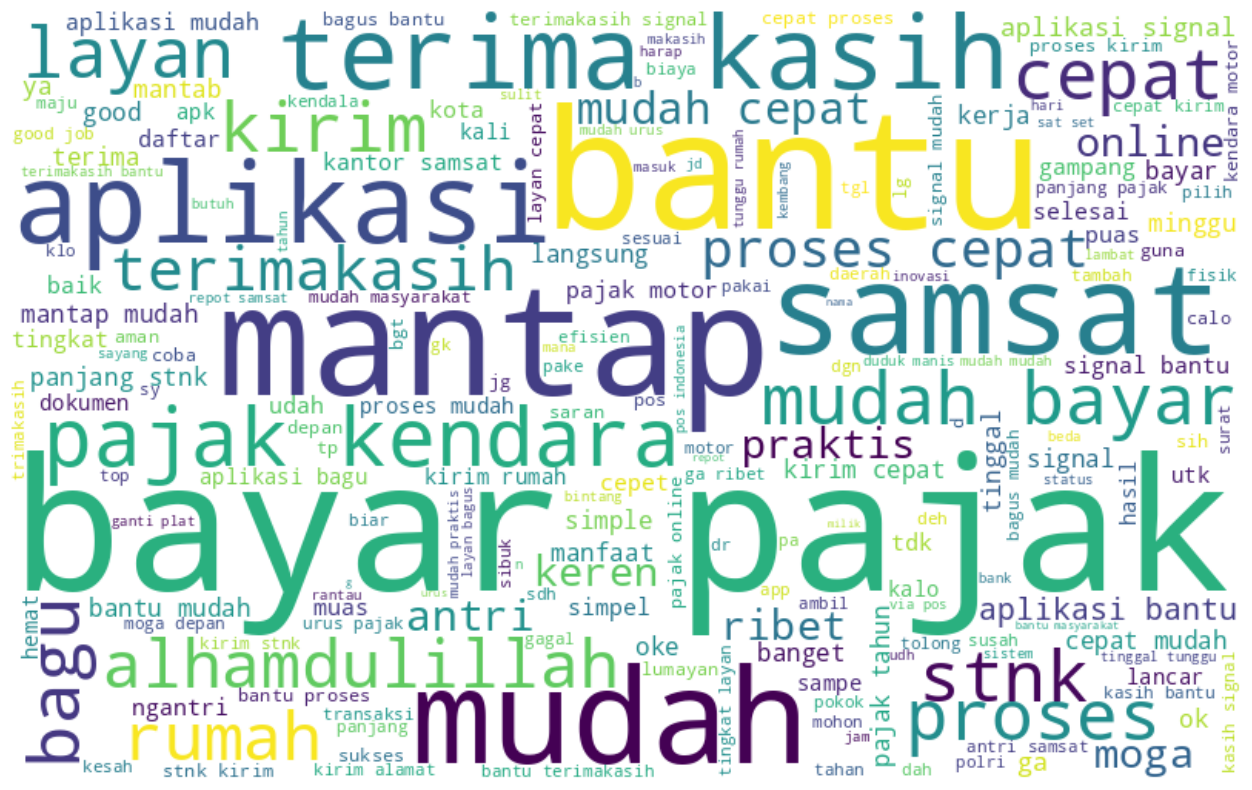

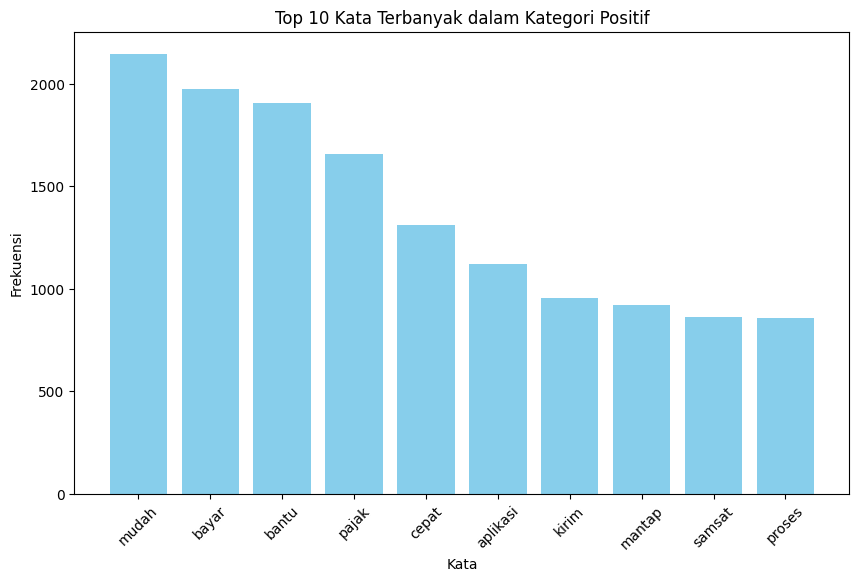

In [60]:
from wordcloud import WordCloud
from collections import Counter

# data sentimen positif
positif_data = df[df['sentiment'] == 1]

# Menggabungkan semua teks dalam satu string
positif_text = ' '.join(positif_data['text_string'])

# Generate WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(positif_text)

# Menampilkan WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Tokenisasi teks
tokens = positif_text.split()

# Menghitung frekuensi kemunculan setiap kata
word_freq = Counter(tokens)

# Mengambil 10 kata teratas
top_10_words = dict(word_freq.most_common(10))

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(top_10_words.keys(), top_10_words.values(), color='skyblue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Top 10 Kata Terbanyak dalam Kategori Positif')
plt.xticks(rotation=45)
plt.show()


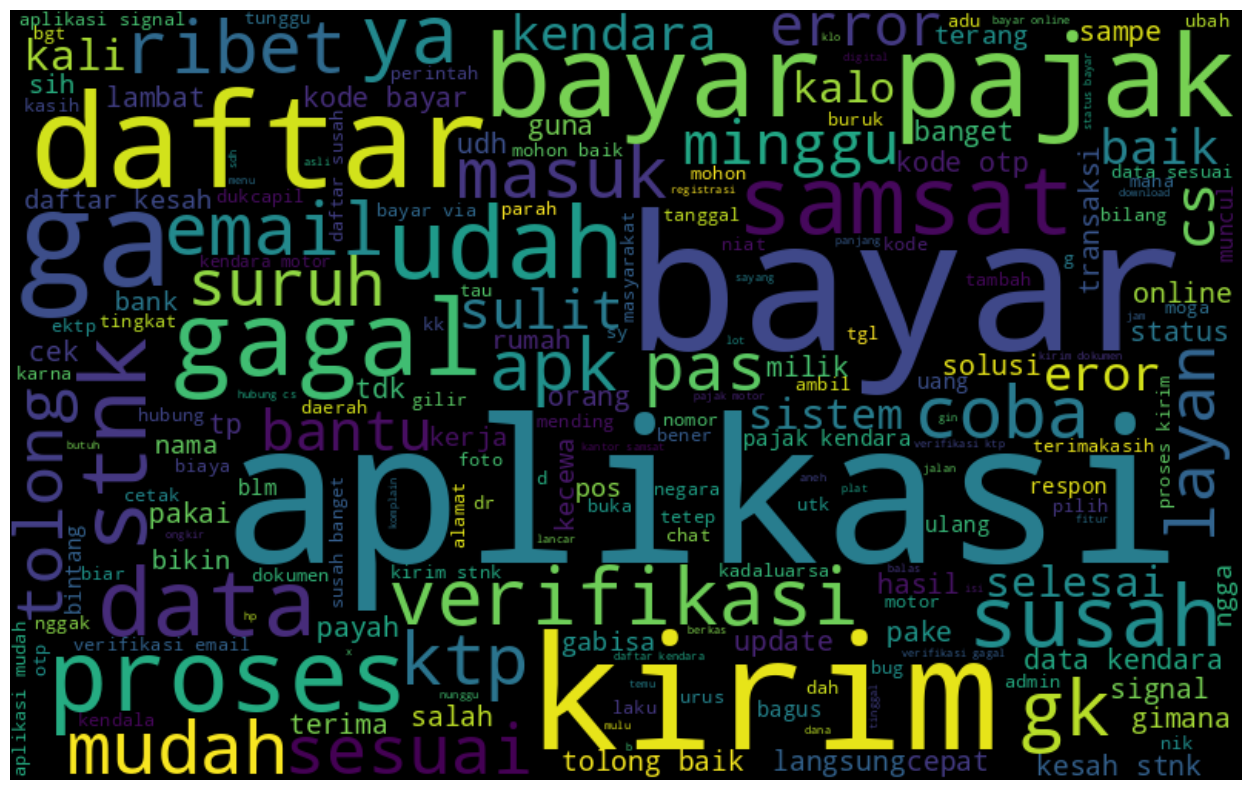

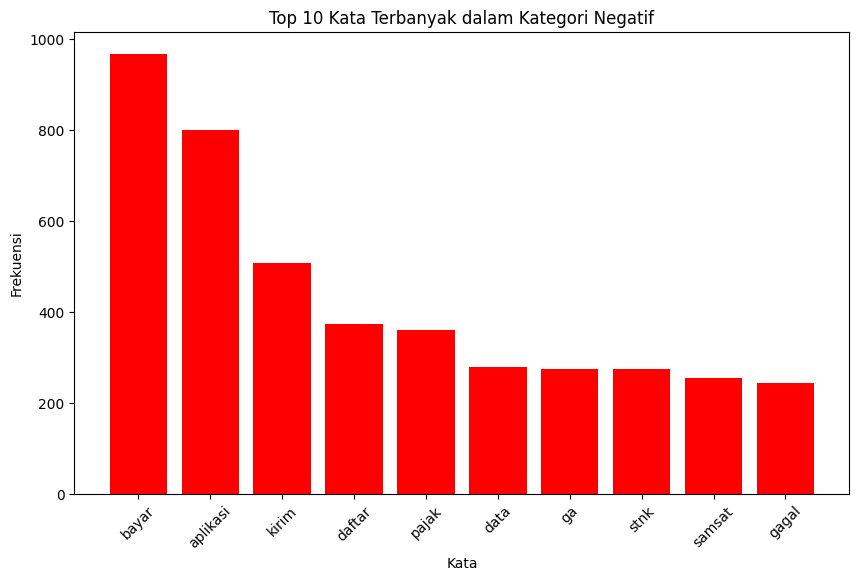

In [61]:
# Filter data untuk sentimen negatif
negatif_data = df[df['sentiment'] == -1]

# Menggabungkan semua teks dalam satu string
negatif_text = ' '.join(negatif_data['text_string'])

# Generate WordCloud untuk sentimen negatif
wordcloud_neg = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(negatif_text)

# Menampilkan WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

# Menghitung frekuensi kemunculan setiap kata dalam teks negatif
tokens_negatif = negatif_text.split()
word_freq_negatif = Counter(tokens_negatif)

# Mengambil 10 kata teratas
top_10_words_negatif = dict(word_freq_negatif.most_common(10))

# Membuat diagram batang untuk kata-kata terbanyak dalam kategori negatif
plt.figure(figsize=(10, 6))
plt.bar(top_10_words_negatif.keys(), top_10_words_negatif.values(), color='red')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Top 10 Kata Terbanyak dalam Kategori Negatif')
plt.xticks(rotation=45)
plt.show()


In [62]:
# Menghitung jumlah ulasan positif dan negatif
jumlah_positif = df[df['sentiment'] == 1].shape[0]
jumlah_negatif = df[df['sentiment'] == -1].shape[0]

print("Jumlah ulasan positif:", jumlah_positif)
print("Jumlah ulasan negatif:", jumlah_negatif)


Jumlah ulasan positif: 7887
Jumlah ulasan negatif: 2113
